In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
from scipy import stats


In [2]:
# Observed data
n_trials = 50
n_successes = 15

# Create the model
with pm.Model() as beta_binomial_model:
    # Beta prior for conversion rate
    theta = pm.Beta("theta", alpha=2, beta=8)

    # Binomial likelihood
    obs = pm.Binomial("obs", n=n_trials, p=theta, observed=n_successes)

    # Sample from posterior
    trace = pm.sample(2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [3]:
# Analytical posterior (for comparison)
posterior_alpha = 2 + n_successes  # 17
posterior_beta = 8 + (n_trials - n_successes)  # 43

print(f"Analytical posterior: Beta({posterior_alpha}, {posterior_beta})")
print(
    f"Analytical posterior mean: {posterior_alpha / (posterior_alpha + posterior_beta):.3f}"
)

# PyMC results
print(f"PyMC posterior mean: {trace.posterior['theta'].mean():.3f}")
print(f"PyMC 95% HDI: {pm.hdi(trace.posterior['theta'], hdi_prob=0.95)}")


Analytical posterior: Beta(17, 43)
Analytical posterior mean: 0.283
PyMC posterior mean: 0.285
PyMC 95% HDI: <xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    theta    (hdi) float64 0.1728 0.3968


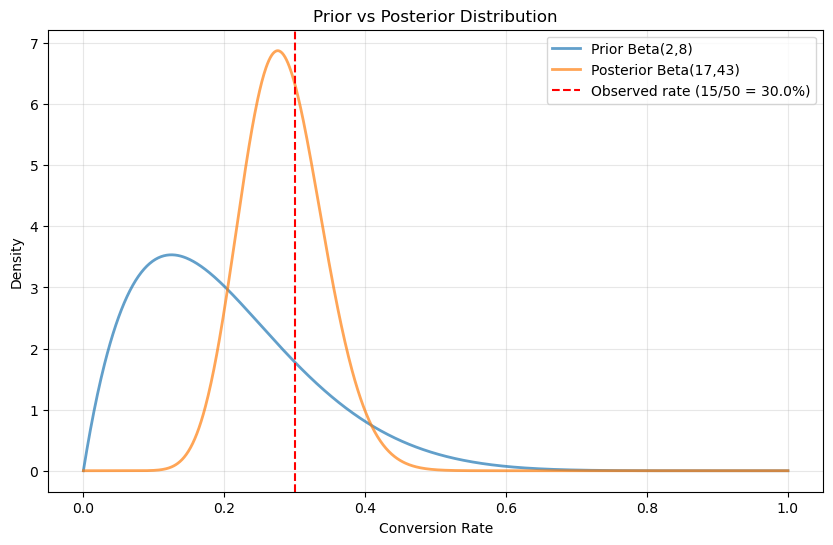

In [4]:
# Plot prior vs posterior comparison
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 1000)

# Calculate densities using scipy for easier plotting
prior_pdf = stats.beta.pdf(x, a=2, b=8)
posterior_pdf = stats.beta.pdf(x, a=17, b=43)

plt.plot(x, prior_pdf, label="Prior Beta(2,8)", alpha=0.7, linewidth=2)
plt.plot(x, posterior_pdf, label="Posterior Beta(17,43)", alpha=0.7, linewidth=2)
plt.axvline(
    n_successes / n_trials,
    color="red",
    linestyle="--",
    label=f"Observed rate ({n_successes}/{n_trials} = {n_successes/n_trials:.1%})",
)
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.title("Prior vs Posterior Distribution")
plt.grid(True, alpha=0.3)
plt.show()


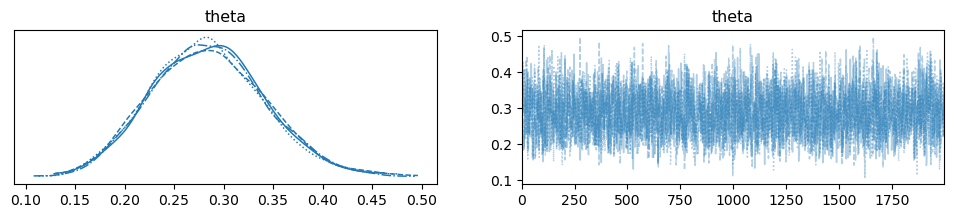

In [5]:
# Plot PyMC trace
pm.plot_trace(trace, var_names=["theta"])
plt.show()


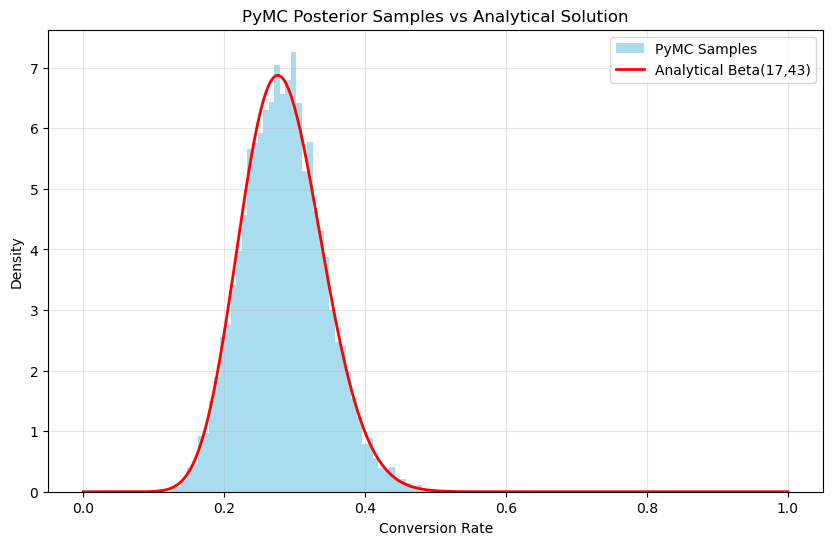

In [6]:
# Plot posterior samples histogram
plt.figure(figsize=(10, 6))
posterior_samples = trace.posterior["theta"].values.flatten()
plt.hist(
    posterior_samples,
    bins=50,
    density=True,
    alpha=0.7,
    label="PyMC Samples",
    color="skyblue",
)
plt.plot(x, posterior_pdf, "r-", linewidth=2, label="Analytical Beta(17,43)")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.title("PyMC Posterior Samples vs Analytical Solution")
plt.grid(True, alpha=0.3)
plt.show()
